<a href="https://colab.research.google.com/github/rc100488/Linear-Regression/blob/main/LR_alma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("/content/50_Startups.csv")

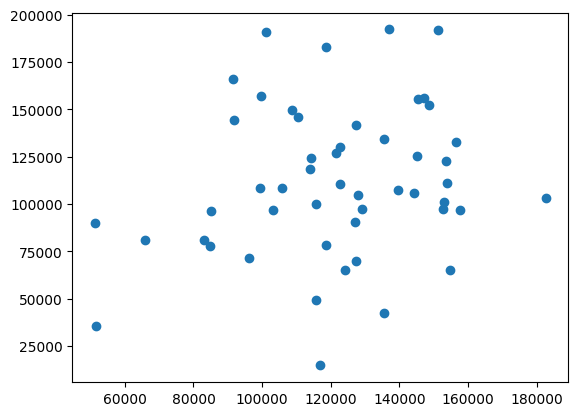

In [4]:
plt.scatter(df['Administration'],df['Profit'])

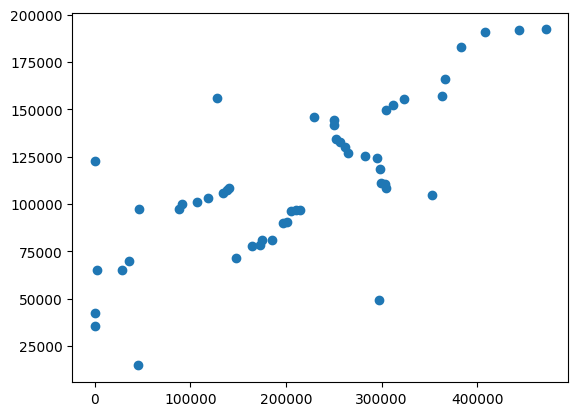

In [5]:
plt.scatter(df['Marketing Spend'],df['Profit'])

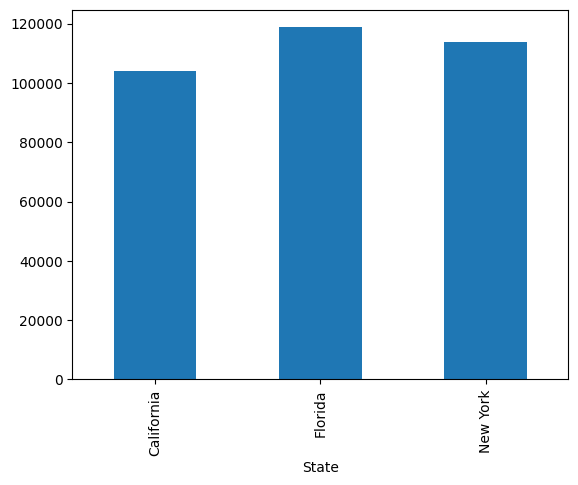

In [8]:
df1 = df.groupby(['State'])['Profit'].mean().plot.bar()

In [9]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
df = df.replace({'New York':1,'California':2,'Florida':3})

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,2
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,3


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[:5]

array([[0.33561668, 0.48655174, 0.45494286, 1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        ],
       [0.45557444, 0.87258866, 0.28413435, 1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.5       ],
       [0.55488118, 0.59103645, 0.62511553, 1.        ]])

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_train = regressor.predict(X_train)
y_train.head()

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([103083.22418255, 132499.19098469, 132504.92013514,  72044.22079157,
       178578.88804813, 116196.18897916,  67901.09868183,  98843.64614762,
       114025.15059486, 167965.96780569])

In [22]:
mean_squared_error(y_test, y_pred)

83372417.44786814

In [23]:
math.sqrt(mean_squared_error(y_train, y_pred_train)) #train performance

9031.881734830407

In [24]:
math.sqrt(mean_squared_error(y_test, y_pred)) #test performance

9130.849765923658

In [25]:
r2_score(y_train, y_pred_train)

0.9501823896560928

In [26]:
r2_score(y_test, y_pred)

0.9348088470484869